In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")


Create dataset

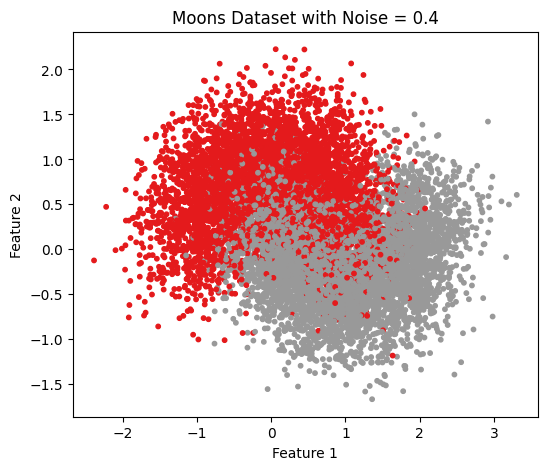

In [20]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, s=10)
plt.title("Moons Dataset with Noise = 0.4")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Split dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Decision tree

In [22]:
depths = [3, 5, 10]
criteria = ['gini', 'entropy']

for criterion in criteria:
    for depth in depths:
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f = f1_score(y_test, y_pred)
        print(f"Decision Tree (Criterion: {criterion}, Depth: {depth}) → Accuracy: {acc:.4f}  F-score: {f:.4f}")


Decision Tree (Criterion: gini, Depth: 3) → Accuracy: 0.8560  F-score: 0.8574
Decision Tree (Criterion: gini, Depth: 5) → Accuracy: 0.8550  F-score: 0.8566
Decision Tree (Criterion: gini, Depth: 10) → Accuracy: 0.8500  F-score: 0.8469
Decision Tree (Criterion: entropy, Depth: 3) → Accuracy: 0.8560  F-score: 0.8574
Decision Tree (Criterion: entropy, Depth: 5) → Accuracy: 0.8550  F-score: 0.8567
Decision Tree (Criterion: entropy, Depth: 10) → Accuracy: 0.8433  F-score: 0.8378


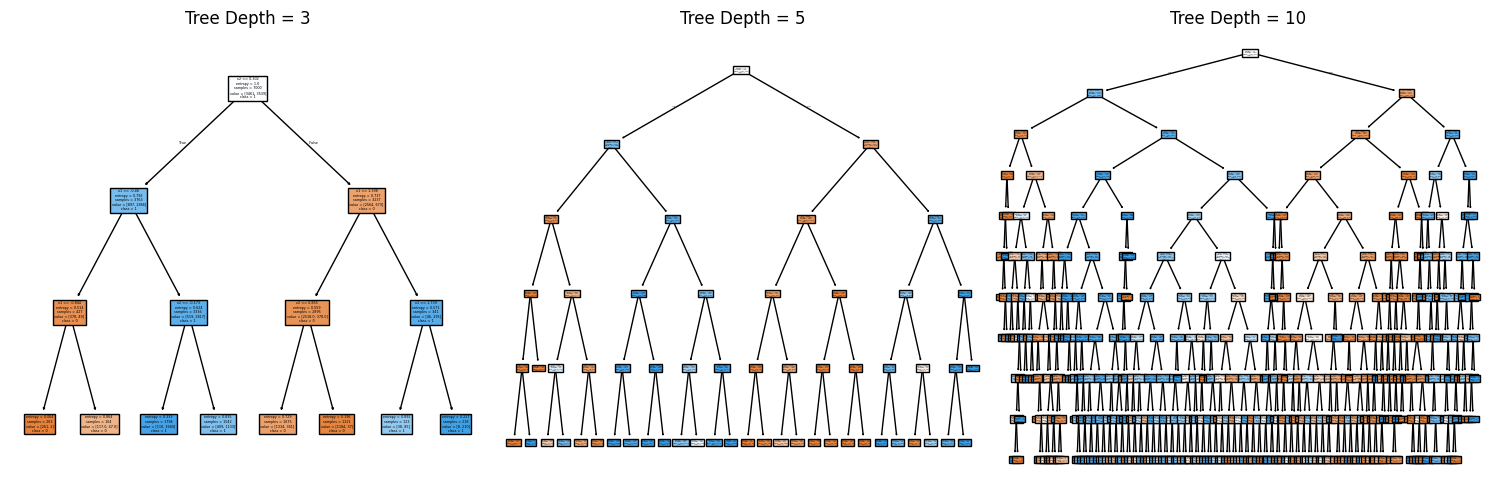

In [23]:
plt.figure(figsize=(15, 5))
for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_tree(clf, filled=True, feature_names=["x1", "x2"], class_names=["0", "1"])
    plt.title(f"Tree Depth = {depth}")
plt.tight_layout()
plt.show()


Random forests

In [24]:
estimators = [5, 25, 100]

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    print(f"Random Forest ({n} trees) → Accuracy: {acc:.4f} F-score: {f:.4f}")


Random Forest (5 trees) → Accuracy: 0.8297 F-score: 0.8290
Random Forest (25 trees) → Accuracy: 0.8453 F-score: 0.8443
Random Forest (100 trees) → Accuracy: 0.8427 F-score: 0.8405


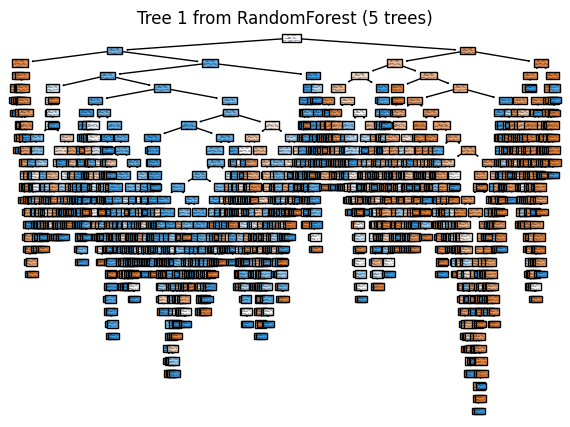

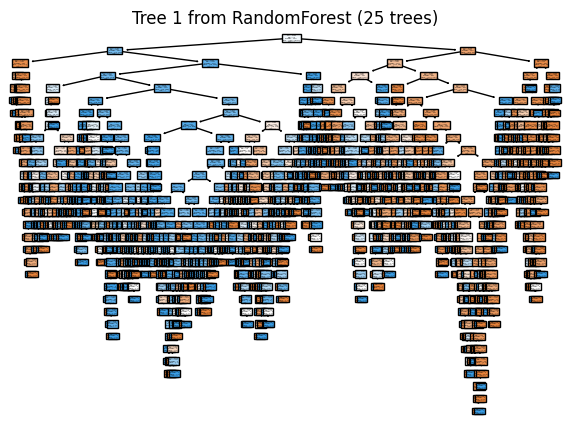

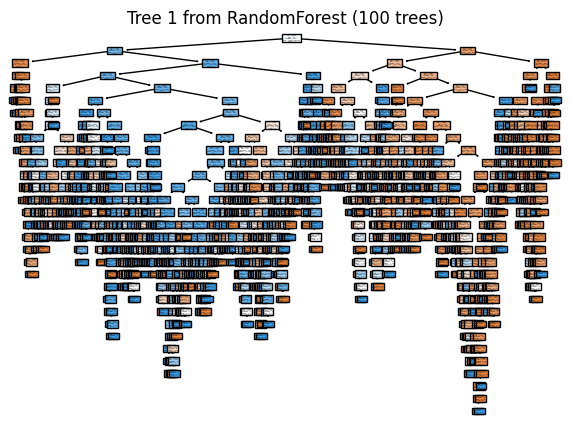

In [25]:
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    plt.figure(figsize=(7, 5))
    plot_tree(rf.estimators_[0], filled=True, feature_names=["x1", "x2"], class_names=["0", "1"])
    plt.title(f"Tree 1 from RandomForest ({n} trees)")
    plt.show()


Logistic regression and svm

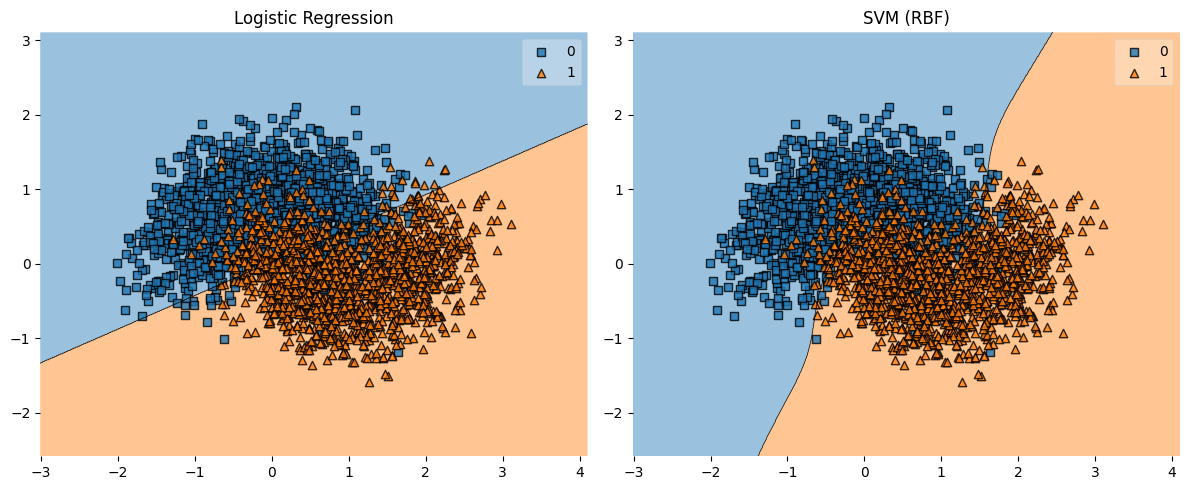

In [26]:
log_clf = LogisticRegression()
svm_clf = SVC(kernel="rbf", probability=True)

log_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_regions(X_test, y_test, clf=log_clf)
plt.title("Logistic Regression")

plt.subplot(1, 2, 2)
plot_decision_regions(X_test, y_test, clf=svm_clf)
plt.title("SVM (RBF)")
plt.tight_layout()
plt.show()


Combined

In [27]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('rf', rf_clf)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
print(f"Voting Classifier → Accuracy: {acc:.4f}  F-score: {f:.4f}")


Voting Classifier → Accuracy: 0.8590  F-score: 0.8572


Summary

In [28]:
print("\n--- Summary ---")
print("Decision Tree (Best): ~" + str(round(max(
    [accuracy_score(y_test, DecisionTreeClassifier(criterion=c, max_depth=d, random_state=42).fit(X_train, y_train).predict(X_test))
     for c in ['gini', 'entropy'] for d in [3, 5, 10]]), 4)))

print("Random Forest (Best): ~" + str(round(max(
    [accuracy_score(y_test, RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train, y_train).predict(X_test))
     for n in [5, 25, 100]]), 4)))

print("Logistic Regression: ~" + str(round(accuracy_score(y_test, log_clf.predict(X_test)), 4)))
print("SVM (RBF): ~" + str(round(accuracy_score(y_test, svm_clf.predict(X_test)), 4)))
print("Voting Classifier: ~" + str(round(acc, 4)))



--- Summary ---
Decision Tree (Best): ~0.856
Random Forest (Best): ~0.8453
Logistic Regression: ~0.8287
SVM (RBF): ~0.8643
Voting Classifier: ~0.859
